# 주성분분석(PCA) 실습

#####  차원 축소 개념 정리
---

데이터에는 중요하지 않은 부분(noise)가 존재하며, 이를 제거하는 방법으로 사용되는 것이 차원 축소(dimension reduction)인 것이다.

차원 축소는 주어진 데이터의 정보 손실을 최소화하면서 줄이는 것이 핵심이다.

비지도학습적인 방법으로는 주성분 분석(Principal Component Analysis)같은 방법이 있고,

지도학습적인 방법으로 선형 판별 분석(Linear Discriminant Analysis)과 같은 방법이 있다.

> 차원의 저주(curse of dimensionality): 데이터의 차원이 커질수록 해당 차원을 표현하기 위해 필요한 데ㅔ이터가 기하급수적으로 많아짐을 의미한다. 
    
    트레이닝 데이터 셋의 차원이 클수록 차원의 저주 떄문에 해당 공간을 적절히 표현하지 못하여 오버피팅될 확률이 높아진다.
    예를 들어 1차원 공간에 데이터를 표현할 수 있는 공간이 0~10까지 있다면 해당 공간에는 10개의 데이터가 포함될 수 있다. 
    2차원 공간을 생각하면 각 축은 0~10으로 공간을 채우는데 필요한 데이터가 100개가 되고 3차원은 1000개가 된다.
    차원 축소를 이용하면 이와 같은 차원의 저주 문제를 해결할 수 있다.


##### 주성분 분석
---
여러 피처가 통계적으로 서로 상관관계가 없도록 **'변환시키는'** 방법이다. 

주성분 분석은 오직 공분산 행렬(covariance matrix) $\Sigma$에만 영향을 받는다.

피처 행렬 100x4이 있다면 그의 공분산 행렬은 4x4, 그들의 고윳값을 구하면 4개의 고유값 $\lambda_1 , \lambda_2, \lambda_3, \lambda_4$과 
고유벡터 $e_1, e_2, e_3, e_4$를 구할 수 있다.

고윳값은 고유벡터의 크기를 나타내며, 분산의 크기를 의미한다. 또한 고유 벡터는 분산의 방향을의미한다. 분산이 큰 고유 벡터에 기존 데이터를 투영해 새로운 데이터를 구할 수 있는데, 이렇게 구한 벡터를 주성분 벡터라고 부른다.

주성분 벡터간의 공분산은 0으로 서로 상관관계가 없다는 것을 알 수 있는데, 주성분 벡터는 서로 직교하는데, 이 직교한다는 뜻은 벡터 끼리의 사잇각이 90도라는 뜻이다. 사잇각이 90도라는 뜻은 내적하면 0이 된다는 뜻. 서로 상관관계가 없다는 것.

공분산 행렬이 $p$차원이라면 고윳값도 $p$ 개 를 구할 수 있다.

(고윳값은 고유벡터의 크기를 나타내며, 분산의 크기를 의미한다고 했으므로)고윳값 $p$개를 다 더하면 데이터 셋의 전체 변동성이 된다.

2차원으로 줄이기로 한다면, 가장 큰 고윳값 두 개를 $\lambda_1 , \lambda_2$라고 하겠다. 모든 람다의 합 분의 $\lambda_1 , \lambda_2$ 을 n% 라고 한다면

$p$ 차원 데이터를 2차원으로 줄였을 때의 전체 변동성의 n%가 설명 가능하다는 뜻이 된다.

##### 10.2.2 와인 데이터를 활용하여 주성분 분석을 통해 차원축소를 해본다.


# Dataset import
## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
# 데이터 셋 내 피처 살펴보기
raw_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 피처, 타깃 데이터 지정

In [3]:
X = raw_wine.data
y = raw_wine.target

## 트레이닝, 테스트 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 1)

## 데이터 표준화

In [5]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 std scaler fitting, Xtn Xte모두.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# PCA를 통한 차원 축소 (2차원)

n_components 옵션을 사용하여 줄이고 싶은 차원수를 설정한다.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

## 데이터 차원 축소 확인

In [11]:
print(X_tn_std.shape)

(133, 13)


In [13]:
print(X_tn_pca.shape)

(133, 2)


2차원 데이터 133개로 구성되도록 잘되었음.

## 공분산행렬

In [14]:
print(pca.get_covariance())

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

## 고윳값, 고유 벡터 확인

In [15]:
print(pca.singular_values_)

[24.81797394 18.31760391]


In [18]:
print(pca.components_)

[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


고유벡터가 바로 각 고윳값에 대응되는 고유 벡터로 이 고유 벡터가 바로 주성분 벡터이다.

## 설명되는 분산

In [19]:
print(pca.explained_variance_)

[4.66615023 2.54192889]


In [20]:
print(pca.explained_variance_ratio_)

[0.35623588 0.19406282]


전체 분산의 약 35.9 퍼센트, 19.6 퍼센트를 설명 가능하다는 것을 볼 수 있다.

## 차원 축소 데이터 확인

데이터 프레임으로 바꾸는 이유는 데이터 시각화에 유리하기 때문이다.

In [21]:
# 해당 pca 데이터를 데이터 프레임으로 만들고 성분에 이름을 붙여준다.

pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns = pca_columns)

# 그리고 타겟 데이터에 y_tn을 붙여준다.

X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)

,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0
1,-1.364444,0.422617,1
2,-1.918072,-2.014682,0
3,-3.539272,-2.878394,0
4,-3.182320,-2.020041,0


## 라벨 미적용 PCA 데이터

차원 축소된 데이터를 시각화 해본다.

라벨이 적용되지 않았다는 말은 타깃 데이터가 없는 경우를 말하는 것이다. 각 데이터가 어떤 와인 클래스를 나타내는지 모른다.

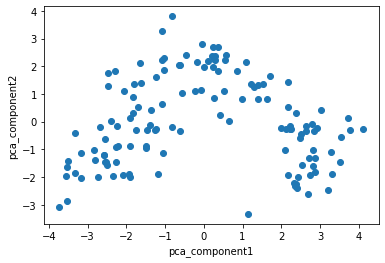

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_tn_pca_df['pca_comp1'], X_tn_pca_df['pca_comp2'], marker = 'o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

## 라벨 적용 PCA 데이터

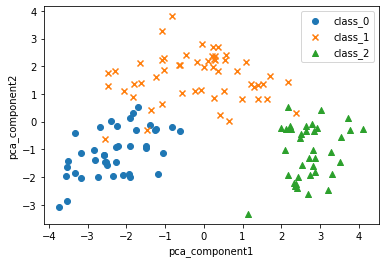

In [24]:
df = X_tn_pca_df   # 편의상

df_0 = df[df['target']== 0]
df_1 = df[df['target']== 1]
df_2 = df[df['target']== 2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, marker = 'o', label = target_0)
plt.scatter(X_12, X_22, marker = 'x', label = target_1)
plt.scatter(X_13, X_23, marker = '^', label = target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()                                               # 범례 추가하기
plt.show()